# Support Vector Regression (SVR)

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing Dataset

In [2]:
df = pd.read_csv('position_salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
X = df.iloc[:, 1:-1].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [4]:
y = df.iloc[:, -1].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [5]:
y = y.reshape(len(y), 1) # rehape(rows, columns)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [6]:
# no need to splitting dataset into Training set and Test set

## Feature Scaling

In [7]:
from sklearn.preprocessing  import StandardScaler

In [8]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
# make different object of StandarScaler, because object yg udah di fit itu udah ada mean dan standar deviasi dari variable sebelumnya
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [9]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [10]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [11]:
# standardization (-3, 3)

## Training Model

In [12]:
from sklearn.svm import SVR

In [13]:
regressor = SVR(kernel = 'rbf') # kernel --> linear/non-linear
regressor.fit(X, y.flatten())

SVR()

## Predicting New Result

In [14]:
y_pred = regressor.predict(sc_X.transform([[6.5]]))
y_pred

array([-0.27861589])

### Inverse Transform Feature Scaling

In [15]:
y_pred = sc_y.inverse_transform(y_pred)
y_pred

array([170370.0204065])

## Visualising SVR Model

In [16]:
y_vis = sc_y.inverse_transform(regressor.predict(X))

In [17]:
X = sc_X.inverse_transform(X)
y = sc_y.inverse_transform(y)

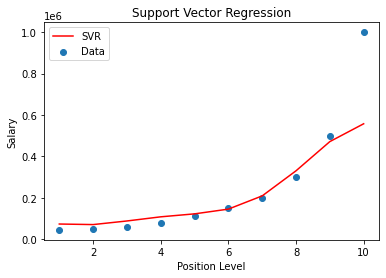

In [18]:
plt.scatter(X, y, label='Data')
plt.plot(X, y_vis, color='red', label='SVR')

plt.legend()
plt.title('Support Vector Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising SVR Model (higher resolution and smoother curve

In [19]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4,
       7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
       8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [20]:
X_grid = X_grid.reshape(len(X_grid), 1)
X_grid = sc_X.transform(X_grid)

In [21]:
y_vis_2 = sc_y.inverse_transform(regressor.predict(X_grid))

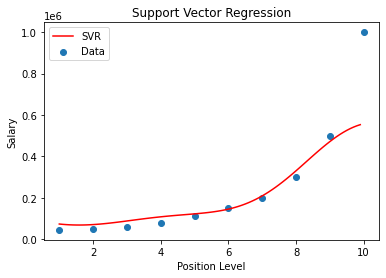

In [22]:
plt.scatter(X, y, label='Data')
plt.plot(sc_X.inverse_transform(X_grid), y_vis_2, color='red', label='SVR')

plt.legend()
plt.title('Support Vector Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()